 <hr size=10> 

# <font color='magenta' > <center> TCCW Mean Ionization States (MISs) </center> </font>

### <font color=#FFBB00 > <center> Michael S. Murillo, 2 December 2023 </center> </font>


This code reads the AA $\langle Z\rangle$ from George and interpolates them. These are the base values for the MIS to use for TCCW-2, other than TF as a comparison. 

 <hr size=10> 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline, PchipInterpolator

import matplotlib as mpl
from cycler import cycler

mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 16, 5.9443
mpl.rcParams['figure.dpi'] = 100

/Users/mmurillo/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, "GP's KS-AA")

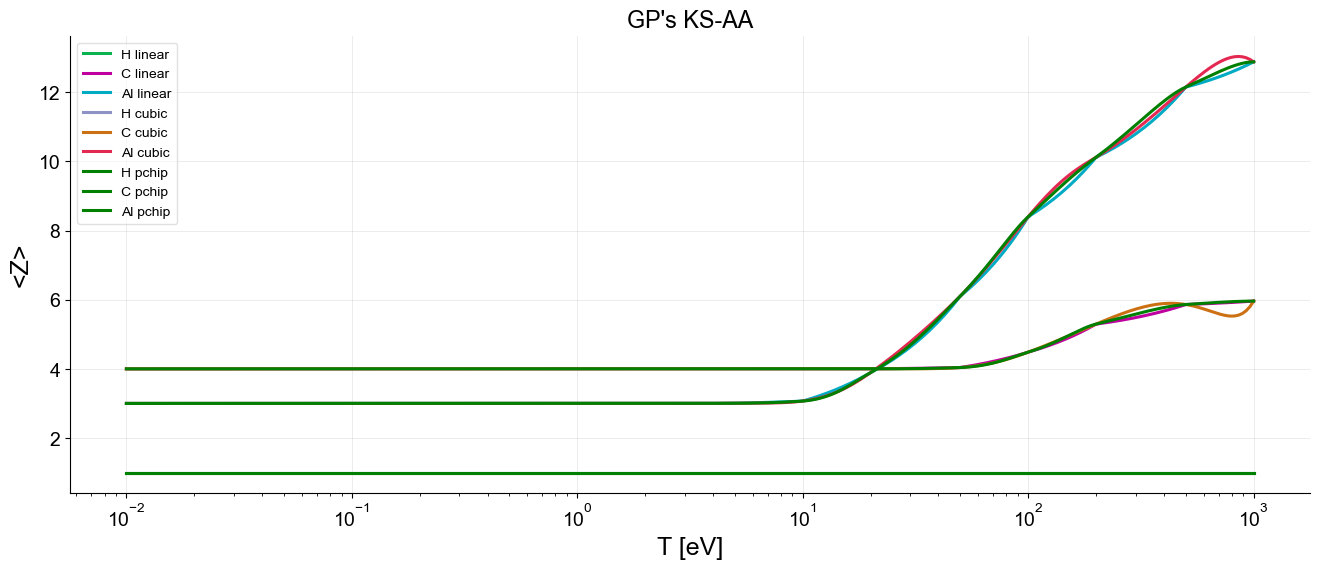

In [7]:
H_GP_df = pd.read_csv("H_GP.csv", delim_whitespace=True)
C_GP_df = pd.read_csv("C_GP.csv", delim_whitespace=True)
Al_GP_df = pd.read_csv("Al_GP.csv", delim_whitespace=True)


# ____ H ____
GP_H_T_few = H_GP_df["Te(eV)"].to_numpy()
GP_H_Z_bar = H_GP_df["Z_bar"].to_numpy()

# linear interpolate
GP_H_T = np.logspace(-2,3, 300)
GP_H_Z_bar_linear = np.interp(GP_H_T, GP_H_T_few, GP_H_Z_bar)
# cubic spline
GP_H_spline = CubicSpline(GP_H_T_few, GP_H_Z_bar)
GP_H_Z_bar_spline = GP_H_spline(GP_H_T)
# Pchip spline
GP_H_pchip = PchipInterpolator(GP_H_T_few, GP_H_Z_bar)
GP_H_Z_bar_pchip = GP_H_pchip(GP_H_T)


# ____ C ____
GP_C_T_few = C_GP_df["Te(eV)"].to_numpy()
GP_C_Z_bar = C_GP_df["Z_bar"].to_numpy()

# linear
GP_C_T = np.logspace(-2,3, 300)
GP_C_Z_bar_linear = np.interp(GP_C_T, GP_C_T_few, GP_C_Z_bar)
# cubic spline
GP_C_spline = CubicSpline(GP_C_T_few, GP_C_Z_bar)
GP_C_Z_bar_spline = GP_C_spline(GP_C_T)
# Pchip spline
GP_C_pchip = PchipInterpolator(GP_C_T_few, GP_C_Z_bar)
GP_C_Z_bar_pchip = GP_C_pchip(GP_C_T)


# ____ Al ____
GP_Al_T_few = Al_GP_df["Te(eV)"].to_numpy()
GP_Al_Z_bar = Al_GP_df["Z_bar"].to_numpy()

# linear
GP_Al_T = np.logspace(-2,3, 300)
GP_Al_Z_bar_linear = np.interp(GP_Al_T, GP_Al_T_few, GP_Al_Z_bar)

# cubic spline
GP_Al_spline = CubicSpline(GP_Al_T_few, GP_Al_Z_bar)
GP_Al_Z_bar_spline = GP_Al_spline(GP_Al_T)

# Pchip spline
GP_Al_pchip = PchipInterpolator(GP_Al_T_few, GP_Al_Z_bar)
GP_Al_Z_bar_pchip = GP_Al_pchip(GP_Al_T)


# plt.semilogx(GP_H_T, GP_H_Z_bar, label='H')
# plt.semilogx(GP_C_T, GP_C_Z_bar, label='C')
# plt.semilogx(GP_Al_T, GP_Al_Z_bar, label='Al')

plt.semilogx(GP_H_T, GP_H_Z_bar_linear, label='H linear')
plt.semilogx(GP_C_T, GP_C_Z_bar_linear, label='C linear')
plt.semilogx(GP_Al_T, GP_Al_Z_bar_linear, label='Al linear')

plt.semilogx(GP_H_T, GP_H_Z_bar_spline, label='H cubic')
plt.semilogx(GP_C_T, GP_C_Z_bar_spline, label='C cubic')
plt.semilogx(GP_Al_T, GP_Al_Z_bar_spline, label='Al cubic')

plt.semilogx(GP_H_T, GP_H_Z_bar_pchip, 'g', label='H pchip')
plt.semilogx(GP_C_T, GP_C_Z_bar_pchip, 'g', label='C pchip')
plt.semilogx(GP_Al_T, GP_Al_Z_bar_pchip, 'g', label='Al pchip')

plt.xlabel("T [eV]")
plt.ylabel("<Z>")
plt.legend()
plt.title("GP's KS-AA")